# Ford GoBike System
## by Omar Magdi

## Investigation Overview

> Insights on San Francisco Bay area, and how are the number of trips and it's duration are affected by various of reasons.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
preset_color = sb.color_palette("Set2")[0]
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
file = 'df_compact.csv'
df_compact = pd.read_csv(file)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Frequency of trips against different variables

> These plots shows the distribution of frequency of trips against different variables. 
> According to this graph it is concluded that male bikers out-number female bikers by 3 times.
    Most of the trips taken are by subscribers. Only few are by customers.

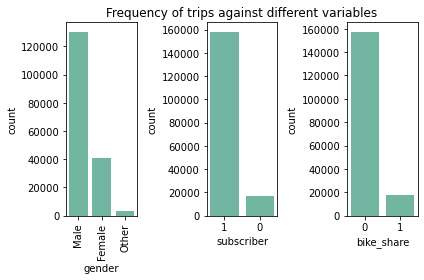

In [5]:
def x_ax(Dataframe, x):
    
    # Ordering variable by descending order
    order = Dataframe[x].value_counts().index
    
    # Returns a count plot
    return sb.countplot(data = Dataframe, x = x , order = order, color = sb.color_palette("Set2")[0]);

# frequency of trips against different variables.
fig, axs = plt.subplots()

plt.subplot(1, 3, 1)
plt.xticks(rotation = 90)
x_ax(df_compact, 'gender')

plt.subplot(1, 3, 2)
plt.title('Frequency of trips against different variables')
x_ax(df_compact, 'subscriber')

plt.subplot(1, 3, 3)
x_ax(df_compact, 'bike_share')

fig.tight_layout();

## Frequency of trips against Age

> The below plot shows peak trips at age of teenagers to mid 30's and drops gradually with increasing age.

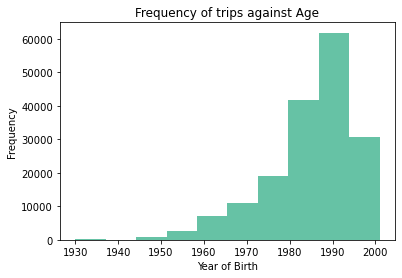

In [6]:
# Hist Plot
plt.title('Frequency of trips against Age')

# Defining parameters
plt.hist(df_compact.yob, bins = 10, color = preset_color)
plt.xlabel('Year of Birth')
plt.ylabel('Frequency');

## Frequency of trips against weekdays

> Bikers are least active on weekends, the graph shows more activity on workdays, with Thursday holding the highest frequency of trips. I believe it is used as a mean of transportation across San Francisco.

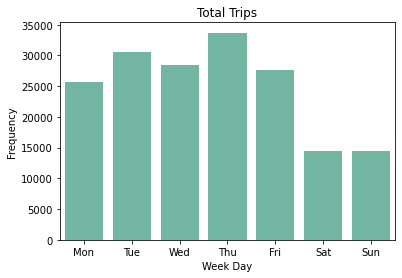

In [20]:
# frequency of trips against weekdays.
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df_compact, x = 'start_day', color = preset_color, order = weekdays);

# Defining parameters
plt.title('Total Trips')
plt.xlabel('Week Day')
plt.ylabel('Frequency');
fig.tight_layout();

## Average duration of trips

> As we have seen in a previous slide, the number of trips by subscribers outnumbers the trips by customers by 8 times.
In addition, the duration it takes to finish a trip by a subscriber is less than a customer by half.


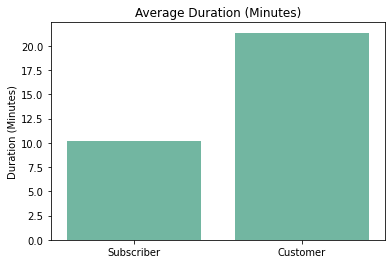

In [21]:
# total count of trips made by subcribers, mean duration of total trips by subscribers
s_count, s_mean = df_compact[df_compact['subscriber'] == 1].duration_min.count(), df_compact[df_compact['subscriber'] == 1].duration_min.mean()

# total count of trips made by customers, mean duration of total trips by customers
c_count, c_mean = df_compact[df_compact['subscriber'] == 0].duration_min.count(), df_compact[df_compact['subscriber'] == 0].duration_min.mean()

# Bar Plot
sb.barplot(data = df_compact, x = ['Subscriber', 'Customer'], y = [s_mean, c_mean], color = preset_color)

# Defining parameters
plt.title('Average Duration (Minutes)')
plt.ylabel('Duration (Minutes)');

## Scatterplot showing the distribution of Duration of trips against Age for each gender.

> This is a Multivariate to clarify the effect of age and gender on the duration of trips.


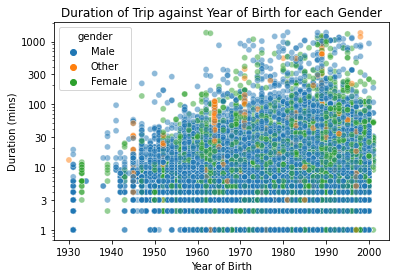

In [8]:
# Scatter Plot
sb.scatterplot(x="yob", y="duration_min", hue="gender", data = df_compact, alpha = 0.5)
plt.yscale('log');
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]

# Defining parameters
plt.yticks(ticks,labels)
plt.title('Duration of Trip against Year of Birth for each Gender')
plt.xlabel('Year of Birth')
plt.ylabel('Duration (mins)');